In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
abnb_4 = pd.read_csv('C:/Users/tnsub/Google Drive/SPRINGBOARD DSC/ABNB_Project/Notebooks/abnb_4_afterwrangling.csv')

In [3]:
abnb_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36536 entries, 0 to 36535
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         36536 non-null  int64  
 1   Listing #                          36536 non-null  int64  
 2   name                               36523 non-null  object 
 3   host_id                            36536 non-null  int64  
 4   host_name                          35275 non-null  object 
 5   host_since                         35275 non-null  object 
 6   host_about                         21034 non-null  object 
 7   host_response_time                 18447 non-null  object 
 8   host_response_rate                 18447 non-null  float64
 9   host_acceptance_rate               19968 non-null  float64
 10  host_is_superhost                  35275 non-null  float64
 11  host_identity_verified             35275 non-null  obj

In [4]:

pd.set_option('display.max_columns', None)

In [5]:
abnb_4.head()

,Unnamed: 0,Listing #,name,host_id,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,reviews_per_month,bathrooms_number,num_amenities,price_bucket,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,2595,Skylit Midtown Castle,2845,Jennifer,2008-09-09,A New Yorker since 2000! My passion is creatin...,within a few hours,0.87,0.24,0.0,t,Midtown,Manhattan,40.75356,-73.98559,Entire apartment,Entire home/apt,2,1,0.0,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",150.0,48,0,0,2009-11-21,2019-11-04,94.0,0,0.35,1.0,31,Low,0,0,1,0,0,1,0,0,0
1,1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,2008-12-07,Laid-back Native New Yorker (formerly bi-coast...,within an hour,0.83,0.94,0.0,t,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1,1.0,3.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",76.0,396,80,2,2014-09-30,2021-03-19,89.0,0,4.98,1.0,35,Low,0,1,0,0,0,1,0,0,0
2,2,5121,BlissArtsSpace!,7356,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,0.0,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in apartment,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",60.0,50,0,0,2009-05-28,2019-12-02,90.0,0,0.35,NaN,5,Low,0,1,0,0,0,0,0,1,0
3,3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,2009-02-03,"Rebecca is an artist/designer, and Henoch is i...",within a few hours,1.00,NaN,0.0,f,Sunset Park,Brooklyn,40.66265,-73.99454,Entire apartment,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""Cable TV"", ""TV"", ""Carbon monoxide...",175.0,1,0,0,2014-01-02,2014-01-02,97.0,0,0.01,1.5,11,Medium,0,1,0,0,0,1,0,0,0
4,4,5178,Large Furnished Room Near B'way,8967,Shunichi,2009-03-03,I used to work for a financial industry but no...,within a day,1.00,1.00,0.0,f,Midtown,Manhattan,40.76457,-73.98317,Private room in apartment,Private room,2,1,1.0,1.0,"[""Heating"", ""Bed linens"", ""TV"", ""Iron"", ""Free ...",79.0,474,1,0,2009-05-06,2020-09-25,84.0,0,3.26,1.0,18,Low,0,0,1,0,0,0,0,1,0


Following two cells will focus changing certain features to datetime objects and use it to calculate the age of the business.
To find how long the listing has been in business, the difference between first_review and last_review was calculated 
(this is only an approximate measure)- call it Age, change it into string and strip the 'days' part.
change it into numeric values  - call it 'Age_days'

In [6]:
# Changing features to datetime objects (using code from Datacamp)
abnb_4['first_review'] = pd.to_datetime(abnb_4['first_review'], infer_datetime_format=True, errors = 'coerce')
abnb_4['last_review'] = pd.to_datetime(abnb_4['last_review'], infer_datetime_format=True, errors = 'coerce')
abnb_4['host_since'] = pd.to_datetime(abnb_4['host_since'],infer_datetime_format=True, errors = 'coerce')

In [7]:
abnb_4['Age'] = (abnb_4['last_review'] - abnb_4['first_review']).astype('string')
abnb_4['Age'] = abnb_4['Age'].str.split(pat=' ', n=0, expand=True)
abnb_4['Age'] = pd.to_numeric(abnb_4['Age'],errors='coerce')

To learn how features are related to each other, it's better to do a correlation analysis and generate a heatmap.
First a subset will be created to include necessary variables


In [8]:
abnb_CorData = abnb_4[['accommodates', 'bedrooms', 'beds', 'price','number_of_reviews_ltm','host_is_superhost', 'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable', 'bathrooms_number', 'num_amenities', 'neighbourhood_group_Bronx'  
,'neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan','neighbourhood_group_Queens','neighbourhood_group_Staten Island','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room', 'Age']]       

In [9]:
corr1 = abnb_CorData.corr()

In [10]:
print(corr1)

                                   accommodates  bedrooms      beds     price  \
accommodates                           1.000000  0.636554  0.728530  0.505647   
bedrooms                               0.636554  1.000000  0.653656  0.378523   
beds                                   0.728530  0.653656  1.000000  0.385490   
price                                  0.505647  0.378523  0.385490  1.000000   
number_of_reviews_ltm                  0.073190  0.010257  0.053357 -0.018364   
host_is_superhost                      0.058163  0.033126  0.063708  0.005853   
number_of_reviews_l30d                 0.067907  0.009640  0.052125 -0.013053   
review_scores_rating                  -0.016251  0.004632 -0.014930  0.060178   
instant_bookable                       0.008106 -0.039097 -0.015781  0.018155   
bathrooms_number                       0.304632  0.411872  0.336541  0.264243   
num_amenities                          0.239731  0.156792  0.233851  0.152517   
neighbourhood_group_Bronx   

<AxesSubplot:>

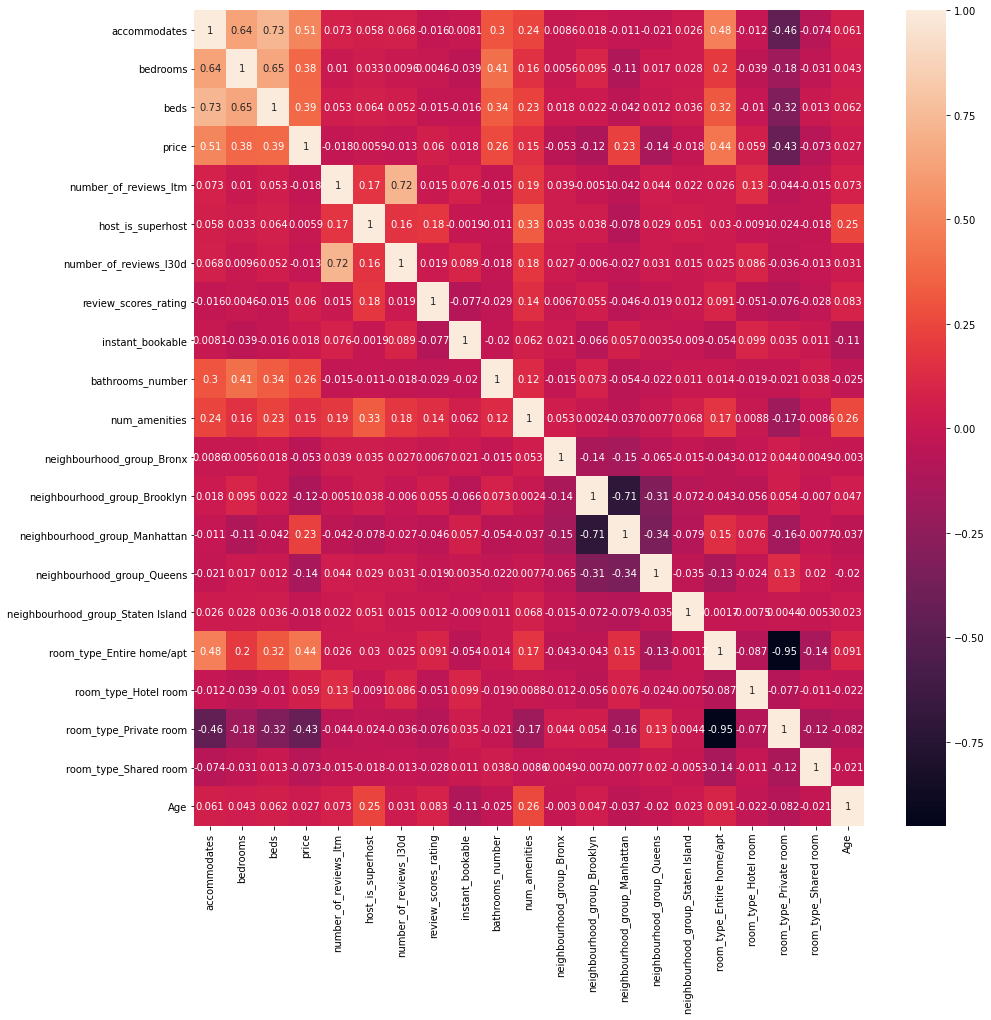

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr1, annot=True, ax=ax)

Price is positively correlated with 1.number of accommodates, 2.number of bedrooms 3.number of beds 4. number of bathrooms, 5.number of amenities 6.if it's an entire home/not 7. if the neighborhood is manhatton/not  and negatively correlated with if it's a private room/not.
However, surprisingly, price didn't show any association with number of reviews or rating score. 

In [16]:
#Examining the scatterplots of reviews, rating against price
#Writing function for scatterplots
def scatterplot(x, y, a, b):
    plt.scatter(x, y)
    plt.xlabel(a)
    plt.ylabel(b)

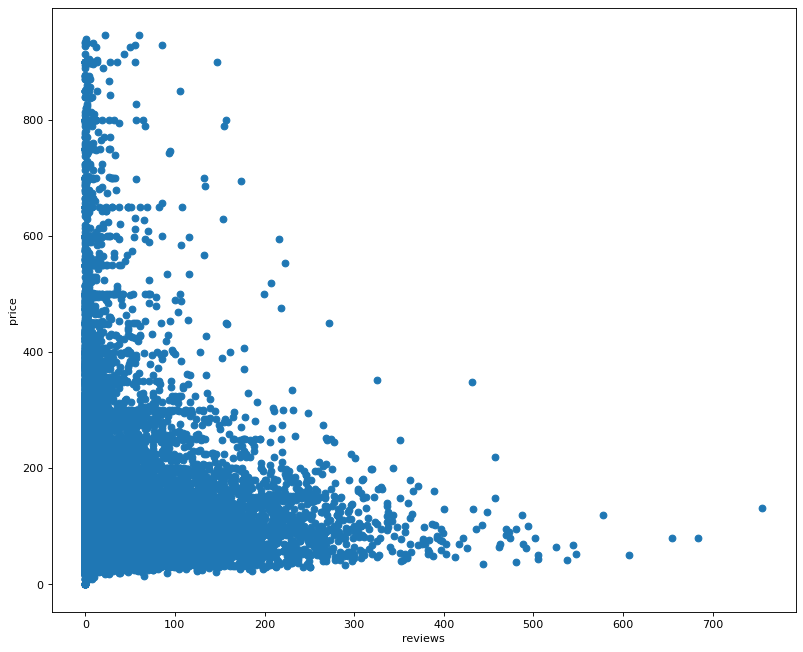

In [17]:
plt.figure(figsize=(12, 10), dpi=80)
scatterplot(abnb_4['number_of_reviews'], abnb_4['price'], 'reviews', 'price')
plt.show()


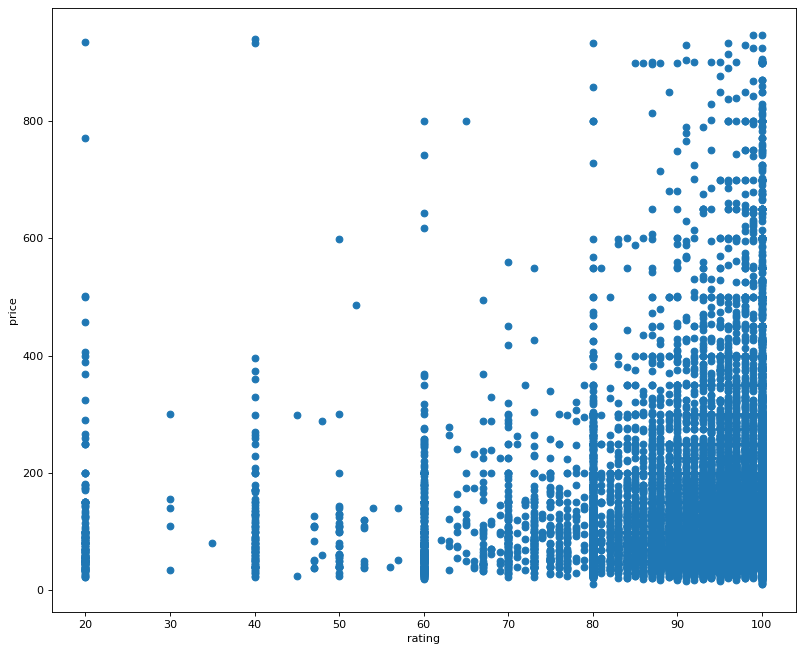

In [107]:
plt.figure(figsize=(12, 10), dpi=80)
scatterplot(abnb_4['review_scores_rating'], abnb_4['price'], 'rating', 'price')

Text(0.5, 1.0, 'Boxplot showing Boroughs and Price Distribution')

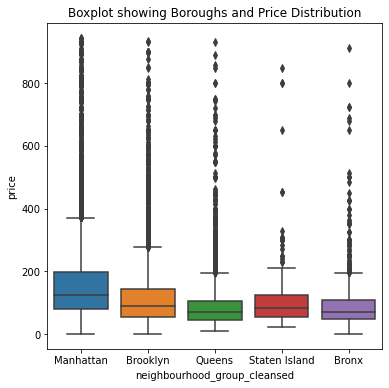

In [24]:
# Checking how the distribution of price varies in different neighborhoods using boxplots
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(ax=ax, y='price', x = 'neighbourhood_group_cleansed', data=abnb_4)
plt.title('Boxplot showing Boroughs and Price Distribution')

The following work will show that the distribution of price shows an exponential distribution.
First ECDF was created for actual price data. Then a theoretical ECDF was created using the mean of price data.
(I followed the method explained in DataCamp - Statistical Thinking Part 2 course)
Since response feature is exponential in nature, we may have to transform it for modeling purposes - like log normal.

In [19]:
# Creating ECDF (Followed the method on DataCamp)
n = len(abnb_4['price'])
y = np.arange(1, (1+n))/n
x = np.sort(abnb_4['price'])


In [21]:
# Theoretical ECDF of price
m = np.mean(abnb_4['price'])
np.random.seed(57)
Theor_price = np.random.exponential(m, 20000)
xt = np.sort(Theor_price)
nt = len(Theor_price)
yt = np.arange(1, (1+nt))/nt

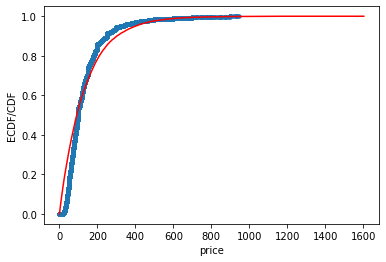

In [22]:
# overlaying both the ECDFs
plt.plot(x, y, marker='.', linestyle='none')
plt.plot(xt, yt, color='red')
plt.xlabel('price')
plt.ylabel('ECDF/CDF')
plt.show()

The following cells will examine the distribution of features 'review_scores_rating' and 'number_of_reviews'

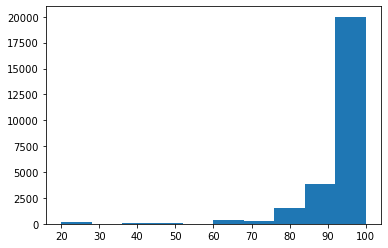

count    26319.000000
mean        93.705422
std          9.840110
min         20.000000
25%         92.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64


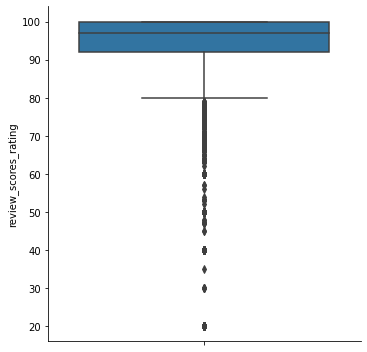

In [23]:
# Histogram
plt.hist(abnb_4['review_scores_rating'])
plt.show()
#summary statistics
print(abnb_4['review_scores_rating'].describe())
#plt.boxplot(abnb_4['price'])
sns.catplot(y='review_scores_rating', data=abnb_4, kind='box')

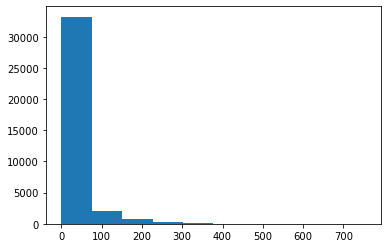

count    36536.00000
mean        22.79163
std         48.11352
min          0.00000
25%          0.00000
50%          4.00000
75%         20.00000
max        755.00000
Name: number_of_reviews, dtype: float64


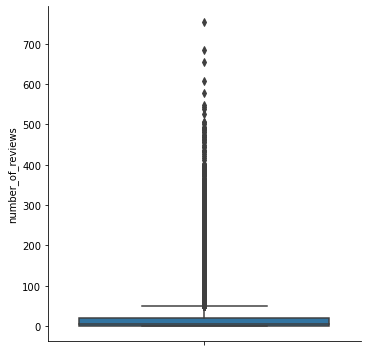

In [49]:
# Histogram
plt.hist(abnb_4['number_of_reviews'])
plt.show()
#summary statistics
print(abnb_4['number_of_reviews'].describe())
#plt.boxplot(abnb_4['price'])
sns.catplot(y='number_of_reviews', data=abnb_4, kind='box')

Although rating and reviews were not related to price, usually when the number of reviews as well as the rating is high the demand for the listing will be higher, and therefore it will have an impact on prices. Therefore, it's advisable to create a variable that takes high values for both rating and reviews. For e.g. gives a value of 1 if both reviews and rating are equal to or exceed the median values, else 0 for other options. 

In [24]:
abnb_4.loc[(abnb_4['review_scores_rating'] >= 97.0) & (abnb_4['number_of_reviews'] >= 20.0), 'high_review_high_rating'] = 1
abnb_4.loc[(abnb_4['review_scores_rating'] >= 97.0) & (abnb_4['number_of_reviews'] < 20.0), 'high_review_high_rating'] = 0
abnb_4.loc[(abnb_4['review_scores_rating'] < 97.0) & (abnb_4['number_of_reviews'] >= 20.0), 'high_review_high_rating'] = 0
abnb_4.loc[(abnb_4['review_scores_rating'] < 97.0) & (abnb_4['number_of_reviews'] < 20.0), 'high_review_high_rating'] = 0

In [25]:
abnb_4['high_review_high_rating'].value_counts()

0.0    22536
1.0     3783
Name: high_review_high_rating, dtype: int64

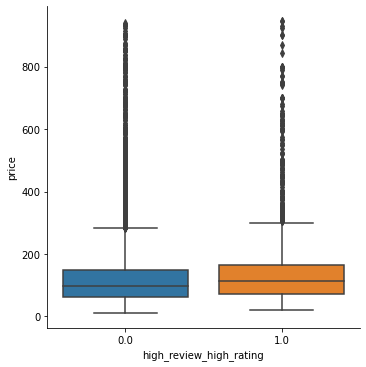

In [26]:
# checking if the lists with high_reviews and high rating show any difference in prices
sns.catplot(y='price', x ='high_review_high_rating' , data=abnb_4, kind='box')

In [27]:
abnb_4.groupby('neighbourhood_cleansed')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Allerton,33.0,98.393939,54.782490,27.0,65.00,85.0,122.00,249.0
Arden Heights,3.0,173.666667,89.812768,94.0,125.00,156.0,213.50,271.0
Arrochar,16.0,107.937500,86.065455,30.0,65.50,82.5,99.00,300.0
Arverne,69.0,205.043478,172.801181,34.0,97.00,131.0,271.00,743.0
Astoria,655.0,87.792366,70.113492,26.0,50.00,70.0,100.00,850.0
...,...,...,...,...,...,...,...,...
Willowbrook,1.0,309.000000,NaN,309.0,309.00,309.0,309.00,309.0
Windsor Terrace,95.0,116.294737,68.197753,24.0,68.50,100.0,149.50,357.0
Woodhaven,73.0,72.219178,46.118280,13.0,49.00,57.0,81.00,265.0


In [22]:
abnb_4.groupby('room_type_Private room')['price'].mean()

room_type_Private room
0    173.195278
1     78.479226
Name: price, dtype: float64

In [23]:
abnb_4.groupby('neighbourhood_group_cleansed')['price'].mean()

neighbourhood_group_cleansed
Bronx             95.093280
Brooklyn         114.057991
Manhattan        158.685081
Queens            91.434421
Staten Island    108.034247
Name: price, dtype: float64

In [29]:
# The prices may also depend on how the local median income levels around the area. Hence, a column was created to add median income
# levels based on the 'neighbourhood_group_cleansed' feature.
val = []
for row in abnb_4['neighbourhood_group_cleansed']:
    if row == 'Manhattan':
        val.append(50985)
    elif row == 'Brooklyn':
        val.append(31406)
    elif row == 'Queens':
        val.append(31992)
    elif row == 'Bronx':
        val.append(22232)
    elif row == 'Staten Island':
        val.append(39777)

abnb_4['income'] = val

Following will focus on creating columns of specific location (e.g. central_park) longitude and latitude. These columns will be concatenated with the main dataframe to calculate the distance between listing and specific location. (this can be done for several other landmarks). However, not sure how many landmarks and points of interest should be considered.

In [30]:
abnb_extra =  abnb_4.apply(lambda x: [40.7812, 73.9665], axis=1, result_type = 'expand')
abnb_extra.columns = ['central_park_lati', 'central_park_longi']

In [33]:
# concatenating with main data
abnb_5 = pd.concat([abnb_extra, abnb_4],axis=1)

In [35]:
abnb_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36536 entries, 0 to 36535
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   central_park_lati                  36536 non-null  float64       
 1   central_park_longi                 36536 non-null  float64       
 2   Unnamed: 0                         36536 non-null  int64         
 3   Listing #                          36536 non-null  int64         
 4   name                               36523 non-null  object        
 5   host_id                            36536 non-null  int64         
 6   host_name                          35275 non-null  object        
 7   host_since                         35275 non-null  datetime64[ns]
 8   host_about                         21034 non-null  object        
 9   host_response_time                 18447 non-null  object        
 10  host_response_rate                

In [43]:
abnb_4['host_is_superhost'].value_counts()

0.0    28985
1.0     6290
Name: host_is_superhost, dtype: int64

In [45]:
# save the cleaned data to new csv file
abnb_5.to_csv(r'C:\Users\tnsub\Google Drive\SPRINGBOARD DSC\ABNB_Project\Notebooks\abnb_5_afterexploratory.csv')